### Student Details

Student Name: Cathaoir Agnew

Student ID: 16171659

# Task 2: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers


In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
import random

In [2]:
# Read the data from the .csv, using the first row as the headers of the data
df = pd.read_csv('01_heights_weights_genders.csv',header=0)

### Printing out the info of the data

In [3]:
# Show just the first few samples so we know it's read correctly
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Check if any missing data 

In [4]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

### Looking at the columns of the data set 

In [5]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

### Printing out the info of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


### Print out the data column types

In [7]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

### Describing the data

In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### Describing the data grouping by Gender 

In [9]:
df.groupby('Gender').describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200.357802  269.989699

### Visualise


### Scatter Plot of height & weight for Gender 

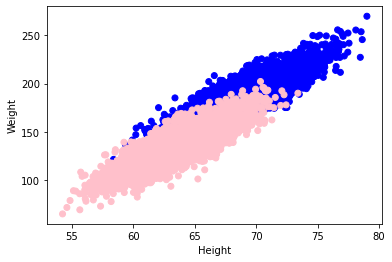

In [10]:
colors = {'Male':'blue', 'Female':'pink'}

plt.scatter(df.Height, df.Weight , c = df.Gender.map(colors))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

### Pandas pivot table of height & weight controlling  
Can see quite a noticable trend of females on average seeming to be smaller in height & weighting less

In [11]:
# returns average weight & height across gender
pd.pivot_table(df, index = 'Gender', values = ['Weight',"Height"])

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


###### Discuss: Do you think there is resonable separation?

Yes looking at the scatterplot there definitely does seem to be a trend of women being smaller in both weight & height. A quick look of the pivot table also shows the averages of both weight & height being smaller for women in comparison to men. The data looks to be resonably normally distributed to use mean & std deviations to summarize the data (check plots below of weight & height).
So I believe there is resonable separation to consider using a ML classifer to predict gender by weight & height.

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight and foot size. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [12]:
X = df.iloc[:,1:3] # X is the features in our dataset
y = df.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

#### Splitting into train test split,
#### Then making predictions on X test data and use Y test to calculate accuracy 

In [13]:
# train test split, with test data being 33% of total data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.33 , random_state= 1)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

#### Initialize Classifier & fitting the training data to the classifier.

In [14]:
# intialize Gaussin Naive Bayes Classifier
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

### Test the algorithm . Predict on the X test data
Using the test data

In [15]:
# Predicting the X test  
pred = GNB.predict(X_test)

In [16]:
# Printing out the accuracy score on the X test 
print("Gaussin Naive Bayes model accuracy (in %):", accuracy_score(y_test , pred)*100)

Gaussin Naive Bayes model accuracy (in %): 88.57575757575758


In [17]:
# calc by hand from tutorial
sum(pred == y_test) / len(pred)

0.8857575757575757

### Plot the random samples

### Looking at the distribution of height & weight  for each gender 
Data looks to be normally distributed. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AEC852CC10>,
      dtype=object)

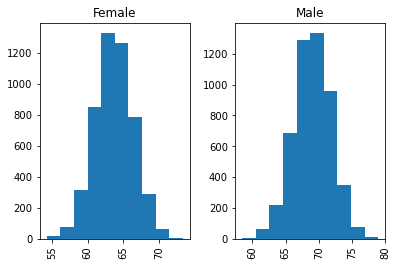

In [18]:
df['Height'].hist(by=df['Gender'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AEC8617D30>,
      dtype=object)

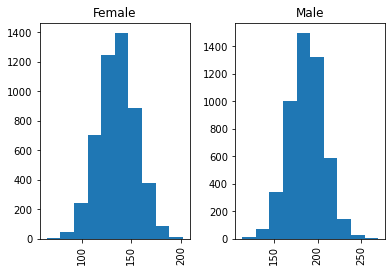

In [19]:
df['Weight'].hist(by=df['Gender'])

### Creating new data points, using a randomly normally distrubution, as above look someway normally distrubution 

In [20]:
new_sample_height = []
new_sample_weight = []

for i in range(5000):
    # these values used below were just the average weight & height of the data set, not specific to gender
    new_sample_height.append(random.normalvariate(66.4,3.84))
    new_sample_weight.append(random.normalvariate(161.4, 32.1))
    
rand_sample = pd.DataFrame(list(zip(new_sample_height,new_sample_weight)) , columns = ["Height", "Weight"]  )

### Going to make predicitons on new data

In [21]:
rand_predicts = GNB.predict(rand_sample)

# adding the predicitons to the dataframe so can plot the predictions 
rand_sample['Predictions'] = rand_predicts

### Plotting the predictions on a scatter plot 
We can see the decision boundary for the GNB classifer below.

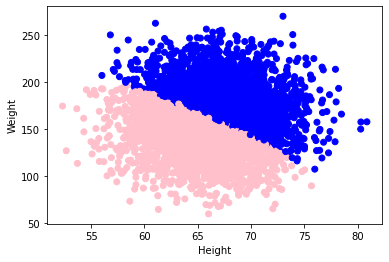

In [22]:
colors = {'Male':'blue', 'Female':'pink'}

plt.scatter(rand_sample.Height, rand_sample.Weight , c = rand_sample.Predictions.map(colors))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

## Using a uniform random distribution
This will give a clearer decision boundary, used Ciarans example for upper/lower limits on weight & height 

In [23]:
new_sample_height_uni = []
new_sample_weight_uni = []

for i in range(5000):
    # these values used below were just taken from ciarans example of his plot 
    new_sample_height_uni.append(random.uniform(55,80))
    new_sample_weight_uni.append(random.uniform(75,250))
    
rand_sample_uni = pd.DataFrame(list(zip(new_sample_height_uni,new_sample_weight_uni)) , columns = ["Height", "Weight"]  )

In [24]:
rand_predicts_uni = GNB.predict(rand_sample_uni)

# adding the predicitons to the dataframe so can plot the predictions 
rand_sample_uni['Predictions'] = rand_predicts_uni

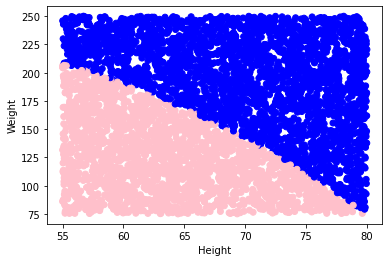

In [25]:
colors = {'Male':'blue', 'Female':'pink'}

plt.scatter(rand_sample_uni.Height, rand_sample_uni.Weight , c = rand_sample_uni.Predictions.map(colors))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()